<a href="https://colab.research.google.com/github/pks916/ml/blob/main/Handwritten_digit_detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


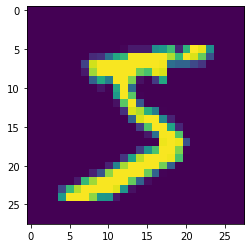

In [8]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [22]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [26]:
X_train=X_train/255
X_test=X_test/255

In [27]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3636 - val_loss: 0.1090
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0704 - val_loss: 0.0976
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0524 - val_loss: 0.0869
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0413 - val_loss: 0.0977
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0305 - val_loss: 0.0872
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0270 - val_loss: 0.0945
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0191 - val_loss: 0.1005
Epoch 8/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0175 - val_loss: 0.1095
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0135 - val_loss: 0.1123
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.011

In [28]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_pred=y_prob.argmax(axis=1)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764